# Kategorik Grafikler 
Kategorilerin İstatistiksel Tahmini

Genellikle Ülkeler veya Şirketler gibi farklı **kategorik** verilere sahibizdir. Yaş veya fiyat gibi sürekli verilerin aksine, Google ile Apple 'arasında' bir şirket değeri yoktur.

Kategori başına istatistiksel bir ölçümü (tahmini) gösteren kategorik grafiklere odaklanacağız. Örneğin, kategori başına ortalama değer veya satır sayısı vb. Bu istatistik ölçümleri, Pandas'la nasıl elde edeceğimizi zaten biliyoruz, ancak bunu çizersek verileri anlamak genellikle daha kolaydır.

Bunun için iki temel kategorik çizim türü vardır:
- countplot()
    - Kategori başına düşen veri satır sayısını sayar.
- barplot()
    - Kategori başına seçilen herhangi bir ölçümü görüntüler.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Veri

In [2]:
df = pd.read_csv("dm_office_sales.csv")

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


## countplot()

Verinin kategorik bir özelliğindeki farklı kategorilere ait toplam satır sayısını gösteren basit bir çizimdir. 

Bir dataframe'deki kategorik bir özelliğe ait farklı kategorik verilerin sayılarını Pandas ile gösterebileceğimi biliyorum. Ama bunu görsel olarak seaborn barplot ile yapabiliriz.

In [4]:
# division kategorik özelliğindeki farklı kategorik veriler
df['division'].unique()

array(['printers', 'peripherals', 'office supplies', 'computer hardware',
       'computer software'], dtype=object)

In [5]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<AxesSubplot:xlabel='division', ylabel='count'>

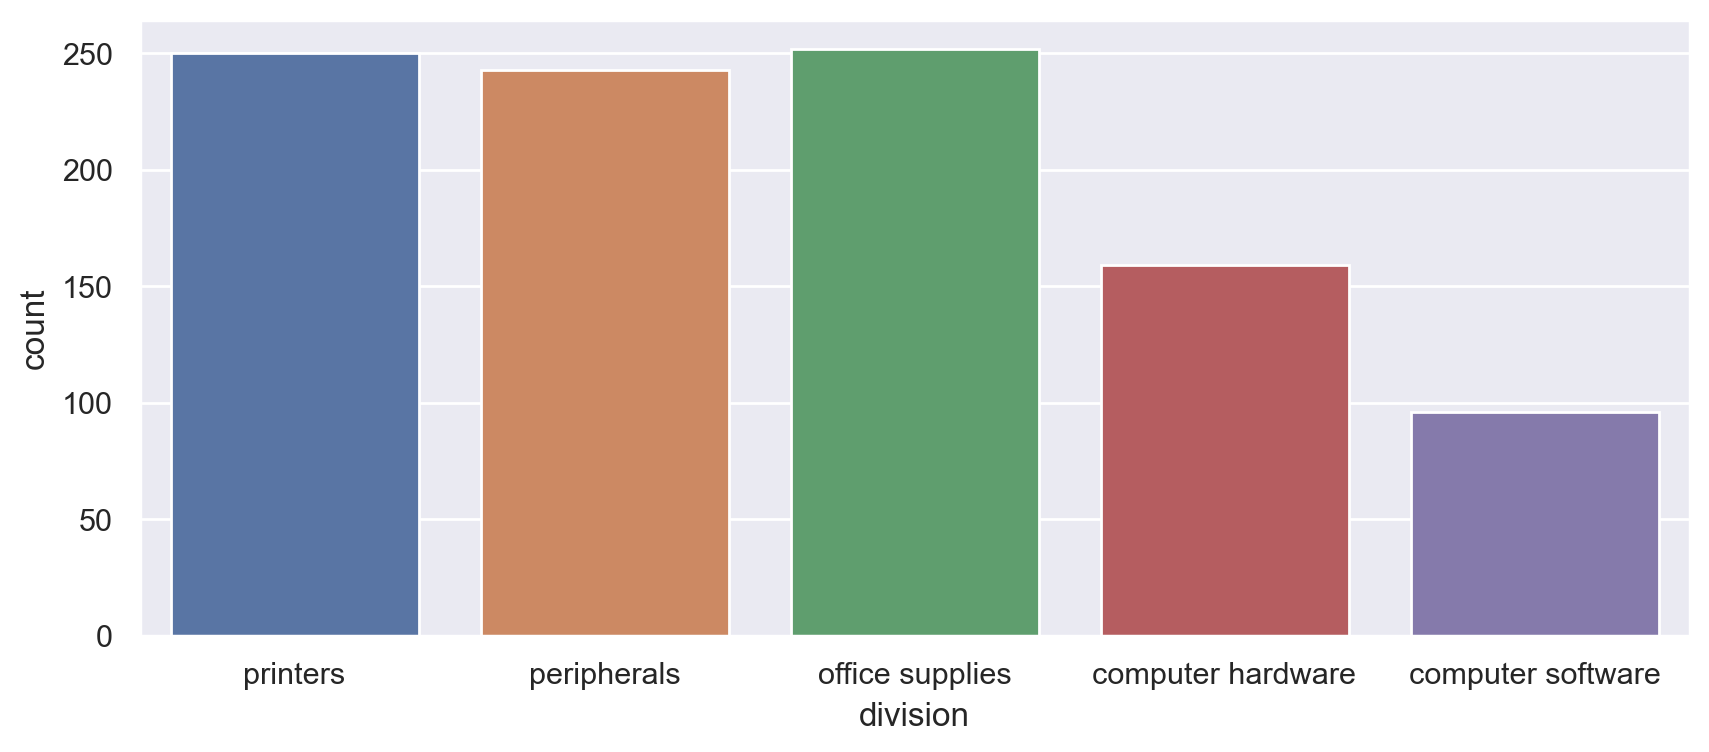

In [6]:
# Kurumsal bölümler için
# seaborn countplot ile çizerek gösterme
sns.set(style='darkgrid')
plt.figure(figsize=(10,4),dpi=200)
# division kategorik özelliğindeki farklı kategorik verilerin sayısını veren grafiği çizer
sns.countplot(x='division',data=df)

In [7]:
df['level of education'].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

<AxesSubplot:xlabel='level of education', ylabel='count'>

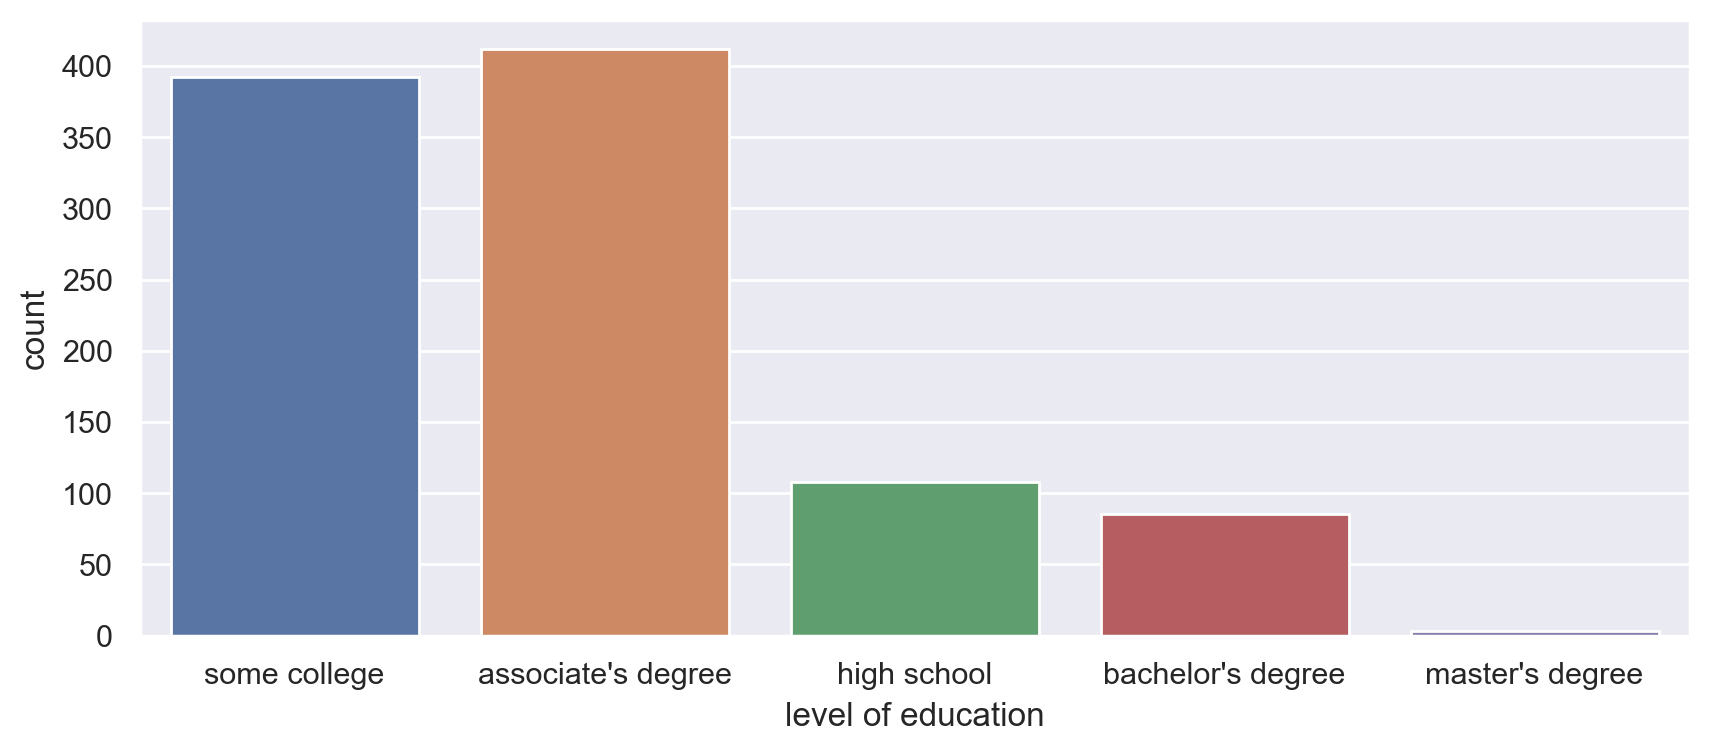

In [8]:
# Eğitim seviyeleri 
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',data=df)

In [9]:
df.head(2)

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660


### Ek hue parametresi ayrımı ile Countplot
'hue' parametresi kullanarak başka bir kategorik özellikle karşılaştırmalı analiz

<AxesSubplot:xlabel='level of education', ylabel='count'>

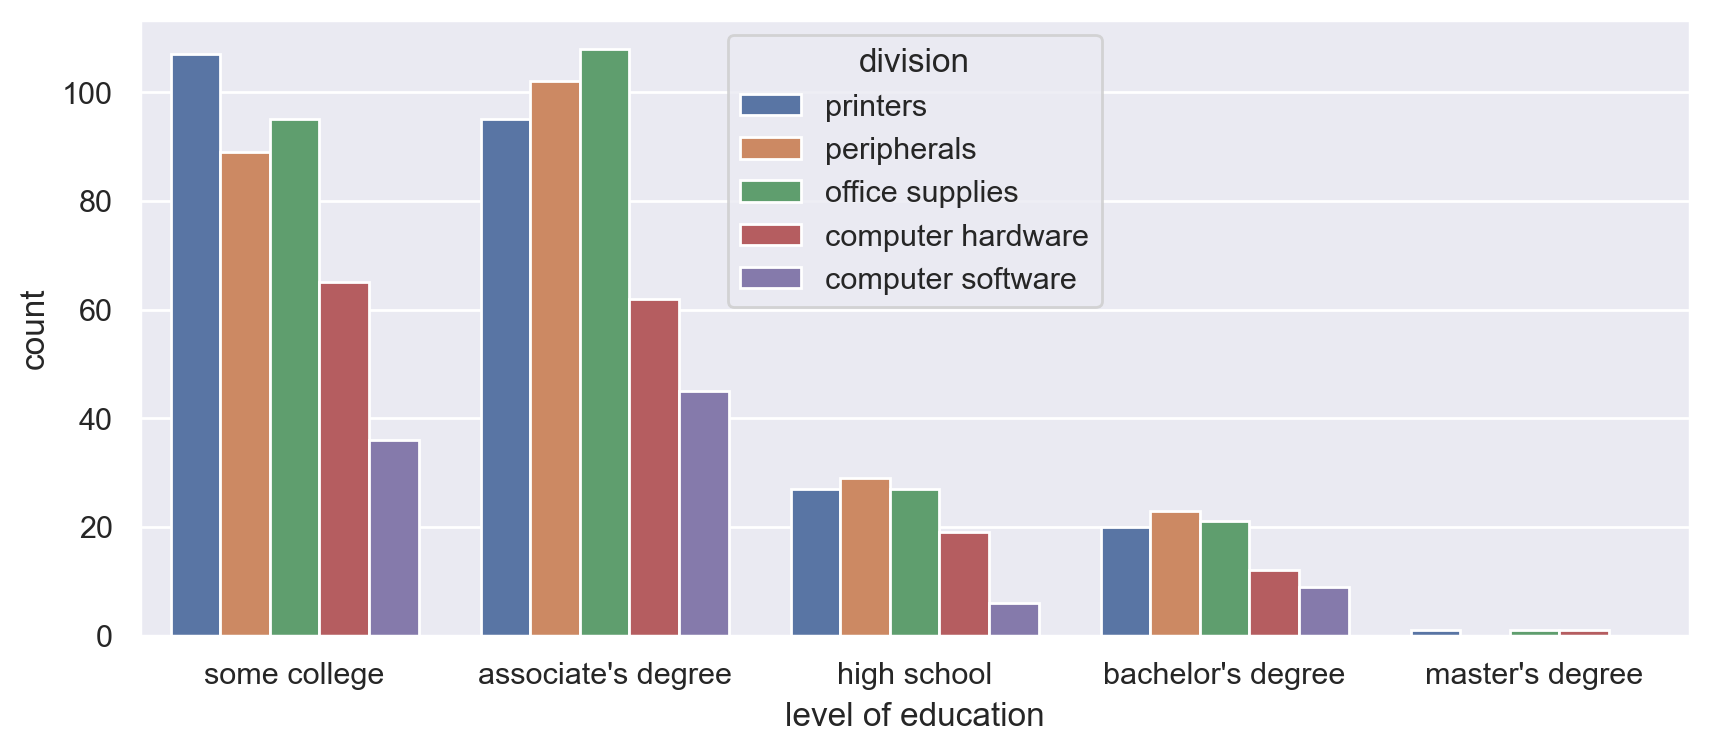

In [10]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',data=df,hue='division')

<AxesSubplot:xlabel='level of education', ylabel='count'>

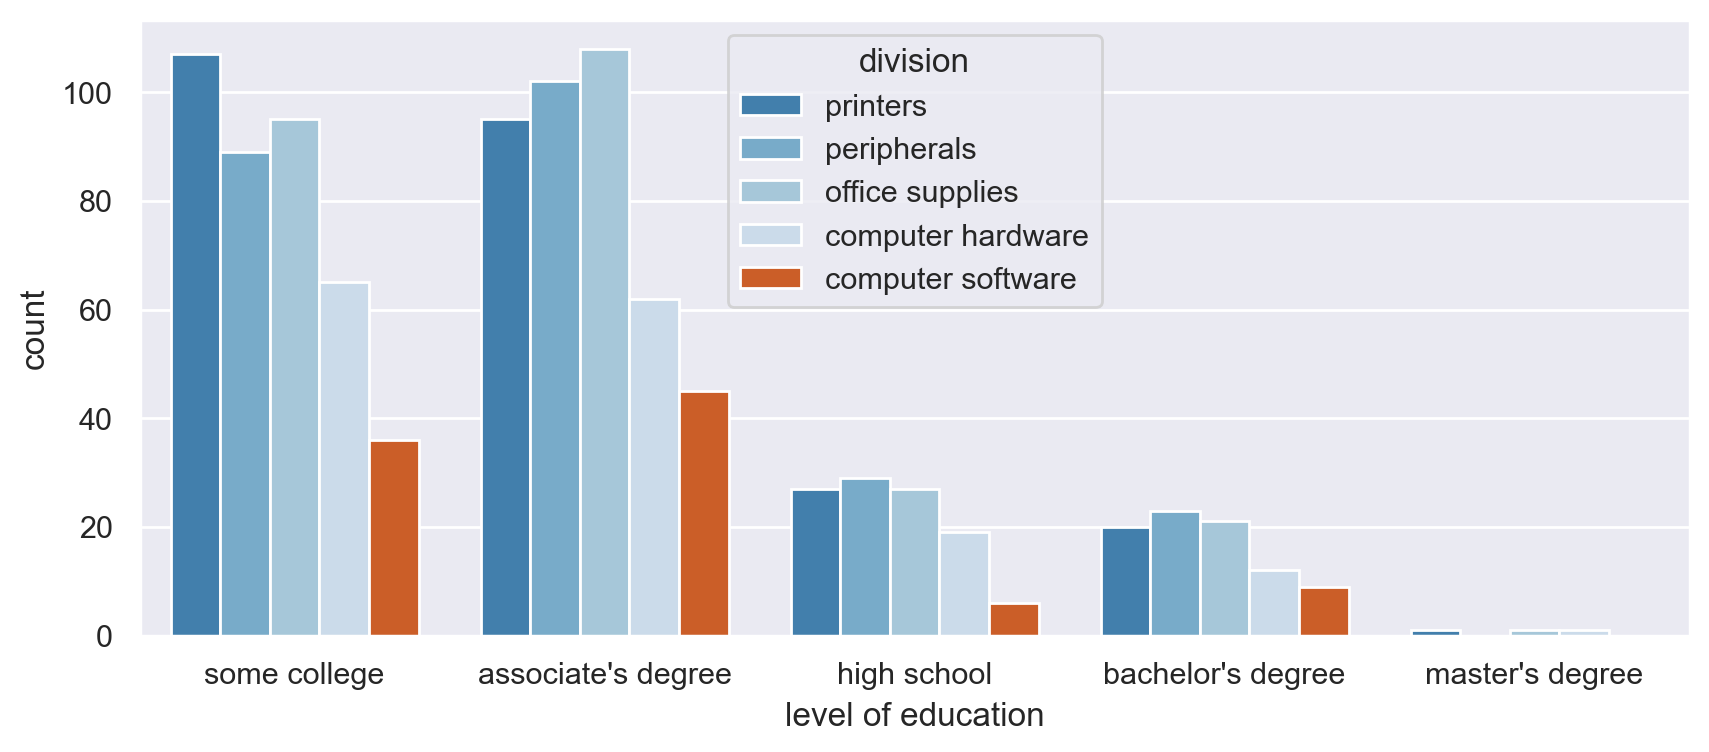

In [11]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',data=df,
              hue='division',
              palette='tab20c')

<AxesSubplot:xlabel='level of education', ylabel='count'>

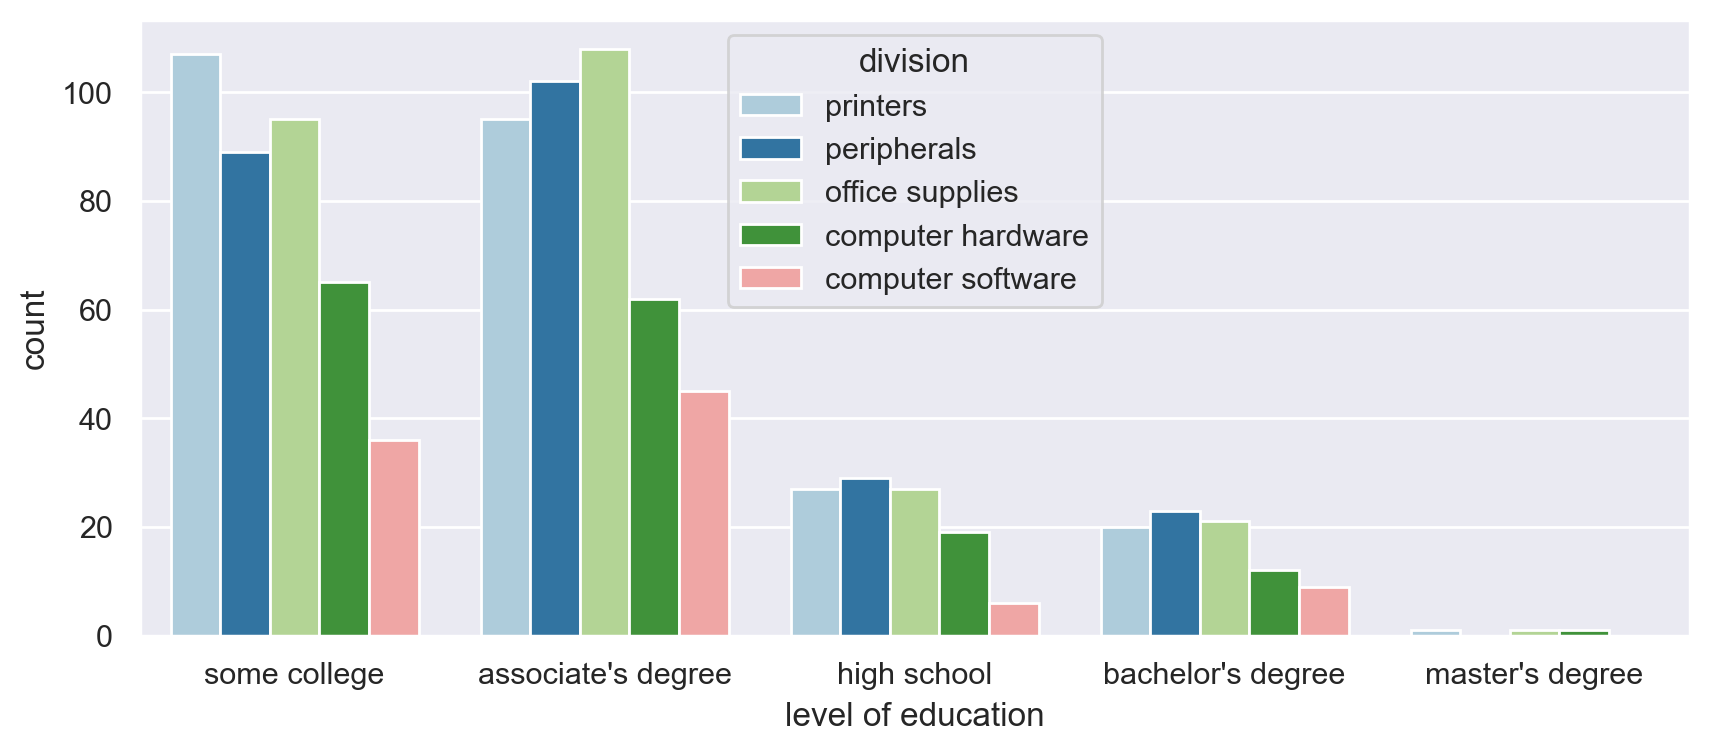

In [12]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',data=df,
              hue='division',
              palette='Paired')

# barplot()

barplot() grafiği, y-ekseninin kategori başına herhangi bir ölçü (tahmin edici) seçmenize izin veren bir formdur. y-ekseni için belirli bir sürekli özellik belirterek görselleştirmelerimizi genişletebiliriz.

Bir barplot() grafiği, her bir dikdörtgenin yüksekliği ile sayısal bir değişken için merkezi eğilim tahminini temsil eder ve hata çubuklarını kullanarak bu tahmin etrafındaki belirsizliğin bir göstergesini sağlar.

1. Standart sapma (SD), bir veri kümesinin ortalamasına göre dağılımını ölçer.
2. SD, istatistikte sıklıkla kullanılır ve finansta genellikle bir yatırımın oynaklığı veya riskliliği için bir vekil olarak kullanılır.
3. Ortalamanın standart hatası (SEM), popülasyon ortalamasına kıyasla bir örneğin ortalamasında ne kadar tutarsızlığın muhtemel olduğunu ölçer.
4. SEM, SD'yi alır ve bunu örnek boyutunun kareköküne böler.
5. SEM her zaman SD'den daha küçük olacaktır.

### SD ve SEM Hesabı

- standart sapma $\sigma=\sqrt{\dfrac{\sum\limits_{i=1}^n(x_i-\bar{x})^2}{n-1}}$
- Varyans = $\sigma^2$
- standart hata $(\sigma_{\bar{x}}) = \dfrac{\sigma}{\sqrt{n}}$
**Burada:**
- $\bar{x} = $ Örnek ortalaması
- $n = $ Örnek boyutu

#### Ortalamanın Standart Hatası (SEM)

Standart hata, örnek ortalamalarının örnekten örneğe değişkenliğini ölçerek  örnek ortalamasının doğruluğunu verir. SEM, örnek ortalamasının, popülasyonun gerçek ortalamasının bir tahmini olarak ne kadar kesin olduğunu açıklar. Örnek verinin boyutu büyüdükçe, SEM, SD'ye göre azalır; bu nedenle, örnek boyutu arttıkça, örnek ortalama, popülasyonun gerçek ortalamasını daha büyük bir kesinlikle tahmin eder.

**Ortalama ve SD çubuğunu gösteren barplot**

In [13]:
df['salary'].describe()

count      1000.000000
mean      90264.207000
std       17398.617174
min       41660.000000
25%       77584.000000
50%       89946.000000
75%      101834.250000
max      159148.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='level of education', ylabel='salary'>

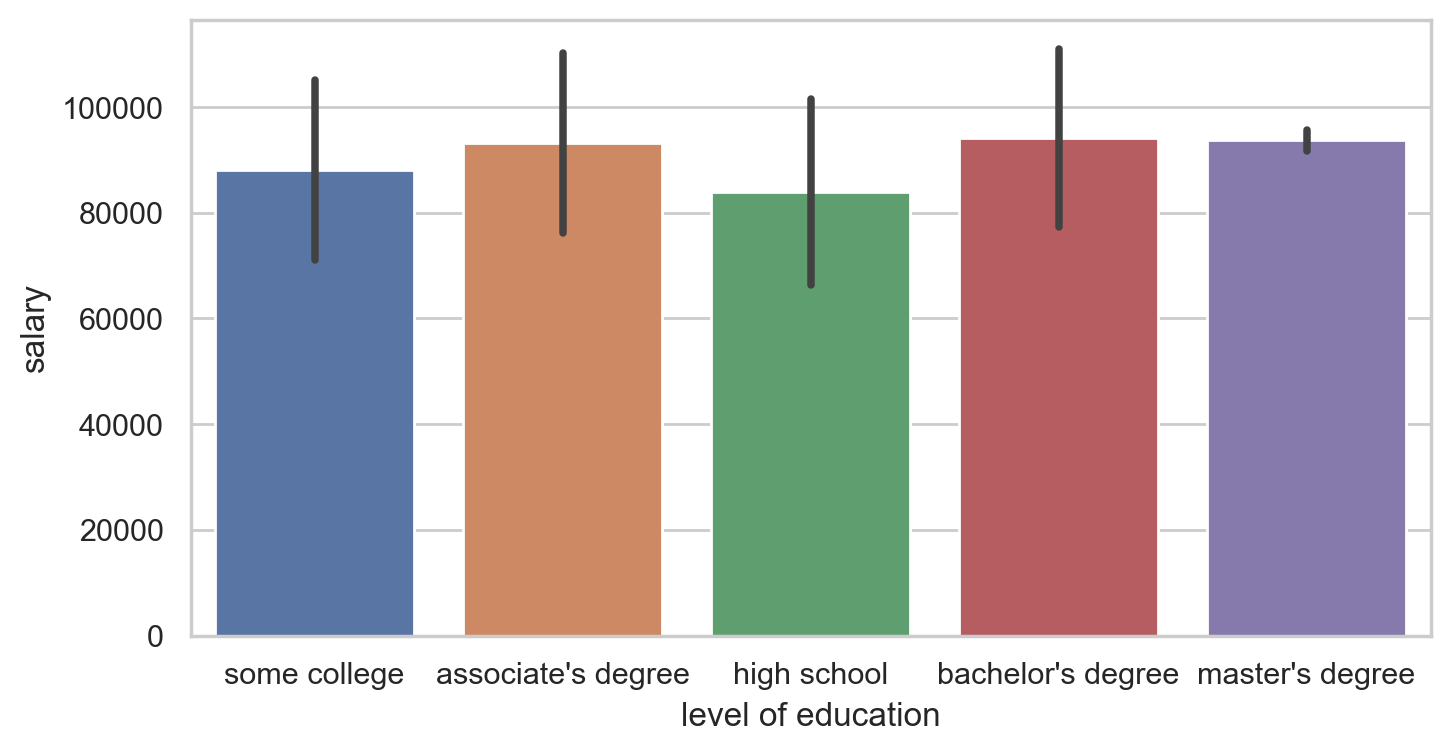

In [14]:
plt.figure(figsize=(8,4),dpi=200)
# Varsayılan olarak barplot() ortalamayı (mean) gösterir
# Siyah çubukla ilgili bilgiler:
# https://stackoverflow.com/questions/58362473/what-does-black-lines-on-a-seaborn-barplot-mean
sns.set(style='whitegrid')
sns.barplot(x='level of education',y='salary',data=df,
            estimator=np.mean,
            ci='sd')

barplot() grafiğinde y-ekseni boyunca gösterilen şey maaştır. Çubuğun yüksekliği ortalama maaş değerini gösterir. Çubuk üzerindeki siyah çizgi ise standart sapmayı temsil eder.

Peki burada görsel olarak ne görebiliyorum?

Görsel olarak, yüksek lisans derecesinin diğer eğitim seviyelerine kıyasla en az standart sapmaya sahip olduğunu görebiliyorum. Bu önemli bir şeydir. Ayrıca lise eğitim seviyesinin en düşük ortalama maaşa sahip olduğunu da görebiliyorum.

Peki birisi size eğitim seviyesine göre ortalama maaşın ne olduğunu sorsa?

Bu en iyi çubuk grafikle mi gösterilir? 

Cevap-Hayır! Bunu bir tablo olarak raporlamanız gerekir.

Birisi size, eğitim seviyesine göre ortalama maaş ve standart sapma değerlerini soruyorsa, bu değerler nedir derse grafik yerine gerçek tabloyu göstermek daha açık olabilir.

barplot() grafiğinde güzel olan şey, ortalamalar arasında kolay bir şekilde karşılaştırma yapabilmektir. Bu özel veri için tüm çubuklar birbirine oldukça yakın olduğu için net olmayabilir. Dolayısıyla bu özel durumda, bu görselleştirmeler yerine basit bir tablo olarak raporlamak daha iyi olurdu.

Bir görselleştirmenin amacının bilgiyi sindirmeyi izleyici için zorlaştırmak değil kolaylaştırmak olduğunu unutmayın.

In [15]:
df.groupby('level of education').agg({'salary':['mean','std']})

salary              
                            mean           std
level of education                            
associate's degree  93156.410194  17066.059357
bachelor's degree   94133.764706  17007.094192
high school         83887.351852  17674.444307
master's degree     93718.000000   2497.627074
some college        88115.836735  17076.281198

<AxesSubplot:xlabel='level of education', ylabel='salary'>

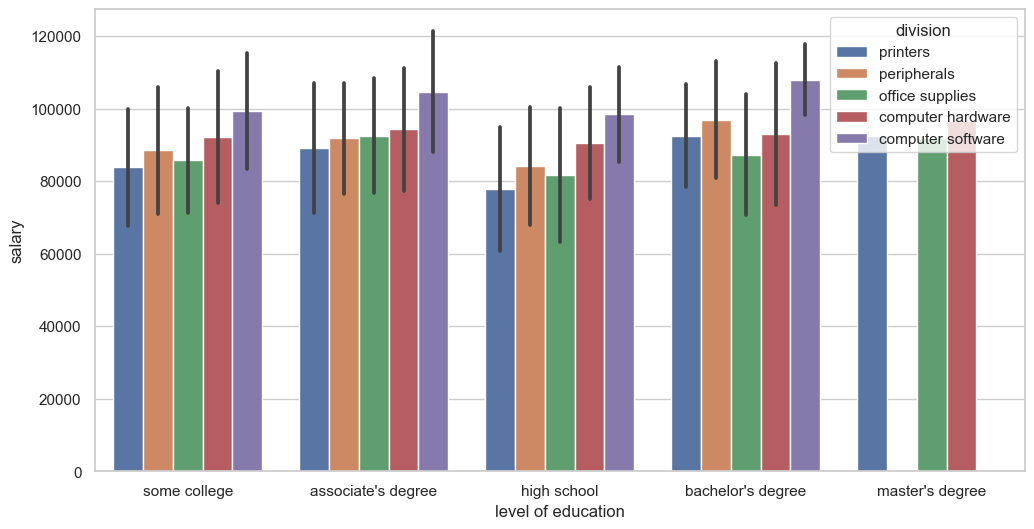

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='level of education',y='salary',data=df,
            estimator=np.mean,
            ci='sd',
            hue='division')

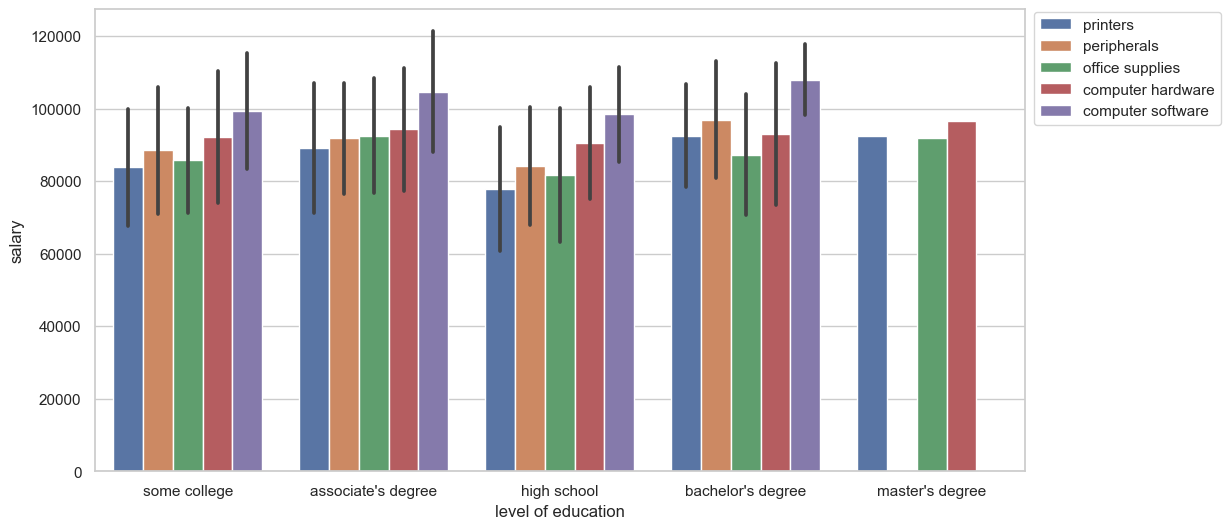

In [17]:
plt.figure(figsize=(12,6),dpi=100)

# https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
sns.barplot(x='level of education',y='salary',data=df,
            estimator=np.mean,
            ci='sd',
            hue='division')

plt.legend(loc=(1.01,0.75))

# SON!